In [8]:
import pandas as pd
df = pd.read_pickle("churn_prediction_v3.pkl")
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2401,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2648,35,Male,0,self_employed,100000,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,2494,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,2629,90,Male,1,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,1879,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0


<AxesSubplot:>

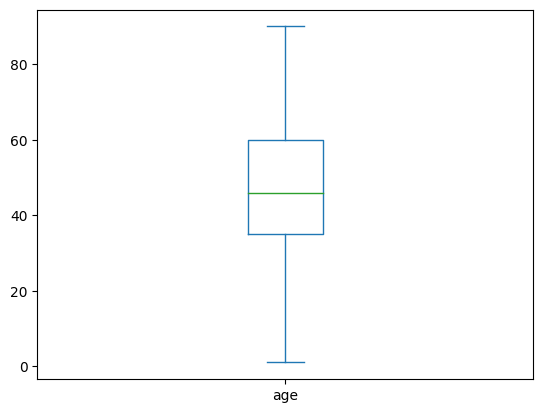

In [9]:
df['age'].plot.box()

In [10]:
df['age'].describe()

count    15929.000000
mean        48.173206
std         17.865539
min          1.000000
25%         35.000000
50%         46.000000
75%         60.000000
max         90.000000
Name: age, dtype: float64

In [11]:
#!pip install seaborn

<AxesSubplot:>

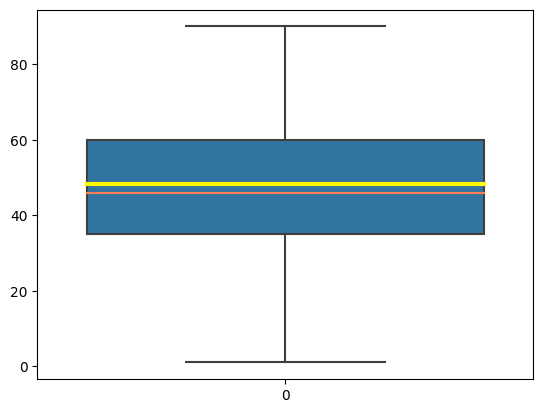

In [12]:
import seaborn as sns
sns.boxplot(df['age'], showmeans=True, medianprops={"color": "coral"}, meanline=True, meanprops={"color": "yellow", "linewidth":3, "linestyle": '-'} )

<AxesSubplot:>

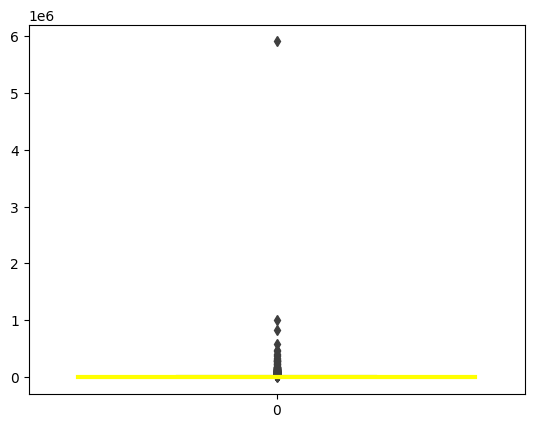

In [13]:
sns.boxplot(df['current_balance'], showmeans=True, medianprops={"color": "coral"}, meanline=True, meanprops={"color": "yellow", "linewidth":3, "linestyle": '-'} )

In [14]:
import numpy as np
from scipy.stats import norm

# Questions on Normal Distribution

#### Q. At a bank, the processing time for personal loan applications follows a normal distribution with a mean of 10 days and a standard deviation of 2 days. Calculate the probability that a randomly selected loan application takes less than 8 days to process.

In [11]:
# P(X<=8) = ???

norm.cdf(8, loc=10, scale=2)

0.15865525393145707

#### A credit card company is concerned about fraudulent transactions. The transaction amounts for legitimate transactions follow a normal distribution with a mean of USD 100 and a standard deviation of USD 20. Calculate the transaction amount above which only 5% of legitimate transactions occur.

In [13]:
# we are looking for the X value where P(X>0.05) ??
norm.isf(0.05, loc=100, scale=20)

132.89707253902947

In [14]:
# we are looking for the X value where P(X <= 0.95) ??
norm.ppf(0.95, loc=100, scale=20)

132.89707253902944

#### A bank is analyzing the monthly credit card bill amounts of its customers. The bill amounts follow a normal distribution with a mean of USD 500 and a standard deviation of USD 100. Calculate the probability that a randomly selected customer has a bill amount exceeding $700.

In [16]:
# X = bill amount
# P(X>700) = ???

norm.sf(700, loc=500, scale=100)

0.022750131948179195

#### A bank is issuing credit cards with a credit limit that follows a normal distribution with a mean of USD 10,000 and a standard deviation of USD 2,000. What is the credit limit below which only 10% of credit cards are issued?

In [18]:
# X = credit limit
# we are looking for the X value where P(X <= 0.1) ??
norm.ppf(0.1, 10000, 2000).round()

7437.0

#### A bank wants to set a minimum balance requirement for a specific account type. The account balances follow a normal distribution with a mean of USD 2000 and a standard deviation of USD 500. What is the minimum balance threshold below which 25% of account holders fall?

In [19]:
# X = minimum bal
# we are looking for the X value where P(X <= 25) ??

norm.ppf(0.25, 2000, 500).round()

1663.0

# HW Problems on Normal Distribution

# Steps for Hypothesis Testing

## Step 1: Formulate the null and alternative hypotheses:

Null Hypothesis (H0): p1 ≤ p2 (churn rates are the same for "self-employed" and other occupations)
Alternative Hypothesis (HA): p1 > p2 (churn rate is higher for "self-employed" occupation)

## Step 2: Collect and prepare the data:

Gather data on customer churn and occupation category from the dataset.
Separate the data into two groups: "self-employed" and other occupations.

## Step 3: Choose a significance level (α):

Determine the desired level of significance for the hypothesis test, commonly chosen as 0.05 (5%).

## Step 4: Compute the test statistic:

## Step 5: Determine the critical value and p-value:

Find the critical value from the standard normal distribution using the chosen significance level (α) or compute the p-value using the test statistic.

## Step 6: Make a decision:

If the test statistic is greater than the critical value or the p-value is less than the chosen significance level (α), reject the null hypothesis.
If the test statistic is less than the critical value or the p-value is greater than the chosen significance level (α), fail to reject the null hypothesis.

## Step 7: Draw a conclusion:

If the null hypothesis is rejected, conclude that there is evidence to suggest that the churn rate is higher for the "self-employed" occupation.
If the null hypothesis is not rejected, conclude that there is insufficient evidence to suggest a difference in churn rates between the "self-employed" occupation and other occupations.

Please note that the specific test statistic and critical value calculation may depend on the type of data and assumptions made. The above steps provide a general framework for hypothesis testing.



## Example 1: Right-Tailed Test

In [3]:
import numpy as np
from scipy.stats import norm

alpha = 0.05
z_stat = 3.125

z_crit = norm.isf(alpha)
z_crit

1.6448536269514729

In [4]:
p_value = norm.sf(z_stat)
p_value  # indeed smaler than alpha of 0.05

# DECISION: REJECT H0.
# Agency's claim that the average disposable income of the families in Banaglore 
# being greater than INR 4200, is indeed valid.

0.0008890252991084321

In [5]:
# using the original sampling distribution
sample_mean = 4250
popln_mean = 4200
popln_std = 3200
n = 40000

SE = popln_std/np.sqrt(n)

p_value = norm.sf(sample_mean, loc=popln_mean, scale=SE)  
p_value

0.0008890252991084321

In [6]:
z_crit = norm.isf(alpha, loc=popln_mean, scale=SE)  
z_crit

4226.317658031224

## Example 2: Left-Tailed Test 

In [17]:
df['age'].mean()

48.17320610207797

In [18]:
# Hypothesis: Avg. age of the customers is less than 50 years.

# HA: mu < 50
# H0: mu >= 50   

In [19]:
sample_mean = df['age'].sample(1000).mean()
sample_mean

47.758

In [20]:
df['age'].std().round(2) # population std dev

17.87

In [21]:
SE = df['age'].std().round(2)/np.sqrt(1000)
z_stat = (sample_mean-50)/SE
z_stat  # this is greater than the Z_crit.

-3.96744628656827

In [22]:
p_value = norm.cdf(z_stat)
p_value  # this exceeds the alpha of 0.05

3.632343906333015e-05

In [23]:
# Hence: Fail to Reject the H0